In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext snakeviz

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from collections import namedtuple
from os.path import join, abspath, dirname, pardir

# LFP sampling frequency
sampling_frequency = 1500

# Data directories and definitions
NOTEBOOK_DIR = !pwd
ROOT_DIR = abspath(dirname(NOTEBOOK_DIR[0]))
RAW_DATA_DIR = join(ROOT_DIR, 'Raw-Data')

Animal = namedtuple('Animal', {'directory', 'short_name'})
animals = {
    'bon': Animal(directory=join(RAW_DATA_DIR, 'Bond'),
                  short_name='bon'),
}

epoch_key = ('bon', 3, 2)

In [31]:
from loren_frank_data_processing import get_position_dataframe
from dask.distributed import Client

In [32]:
client = Client(n_workers=2)
client

Client Scheduler: tcp://127.0.0.1:63804 Dashboard: http://127.0.0.1:63805/status,Cluster Workers: 2 Cores: 4 Memory: 17.18 GB


In [11]:
%time get_position_dataframe(epoch_key, animals)

CPU times: user 5.39 s, sys: 606 ms, total: 5.99 s
Wall time: 16.4 s


,x_position,y_position,head_direction,speed,linear_distance,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,
01:02:09.025500,215.55,128.70,1.929567,7.920192,20.236095,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,20.236095,0.054171,0.054171
01:02:09.058900,215.10,127.80,1.815775,7.920192,21.138879,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,21.138879,0.054171,0.054171
01:02:09.092300,214.65,127.35,1.975688,7.822083,21.591671,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,21.591671,0.107722,0.107722
01:02:09.125599,214.65,126.90,1.929567,7.651978,22.041662,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,22.041662,0.159603,0.159603
01:02:09.159000,214.65,126.45,1.975688,7.347363,22.491653,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,22.491653,0.209456,0.209456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:17:39.846600,181.80,83.70,-1.325818,19.823752,120.391897,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,253.611127,-1.241149,1.241149
01:17:39.880000,180.90,82.35,-1.292497,20.613859,119.002121,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,252.221351,-1.020690,1.020690
01:17:39.913300,180.00,82.35,-1.292497,21.288728,118.960931,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,252.180161,-0.781931,0.781931


In [6]:
%time get_position_dataframe(epoch_key, animals)

CPU times: user 30.5 s, sys: 1.45 s, total: 31.9 s
Wall time: 33.4 s


,x_position,y_position,head_direction,speed,linear_distance,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,
01:02:09.025500,215.55,128.70,1.929567,7.920192,20.236095,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,20.236095,0.054171,0.054171
01:02:09.058900,215.10,127.80,1.815775,7.920192,21.138879,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,21.138879,0.054171,0.054171
01:02:09.092300,214.65,127.35,1.975688,7.822083,21.591671,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,21.591671,0.107722,0.107722
01:02:09.125599,214.65,126.90,1.929567,7.651978,22.041662,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,22.041662,0.159603,0.159603
01:02:09.159000,214.65,126.45,1.975688,7.347363,22.491653,0.0,Center Arm,1,NaN,NaN,NaN,NaN,NaN,22.491653,0.209456,0.209456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:17:39.846600,181.80,83.70,-1.325818,19.823752,120.391897,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,253.611127,-1.241149,1.241149
01:17:39.880000,180.90,82.35,-1.292497,20.613859,119.002121,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,252.221351,-1.020690,1.020690
01:17:39.913300,180.00,82.35,-1.292497,21.288728,118.960931,3.0,Left Arm,118,NaN,NaN,NaN,NaN,NaN,252.180161,-0.781931,0.781931


In [81]:
%timeit get_position_dataframe(epoch_key, animals)

35.8 s ± 848 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
from loren_frank_data_processing import get_interpolated_position_dataframe

position_info = get_interpolated_position_dataframe(epoch_key, animals)

In [27]:
%time get_interpolated_position_dataframe(epoch_key, animals)

CPU times: user 4min 55s, sys: 27 s, total: 5min 22s
Wall time: 14min 45s


,x_position,y_position,head_direction,speed,linear_distance,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,
01:02:08.983700,NaN,NaN,NaN,NaN,NaN,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
01:02:08.984366,NaN,NaN,NaN,NaN,NaN,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
01:02:08.985033,NaN,NaN,NaN,NaN,NaN,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
01:02:08.985700,NaN,NaN,NaN,NaN,NaN,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
01:02:08.986366,NaN,NaN,NaN,NaN,NaN,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:17:40.015700,178.65,81.45,-1.165905,21.852722,118.000088,3.0,Left Arm,118,NaN,NaN,NaN,False,NaN,251.219318,-1.396424e-06,1.396424e-06
01:17:40.016366,178.65,81.45,-1.165905,21.852722,118.000088,3.0,Left Arm,118,NaN,NaN,NaN,False,NaN,251.219318,-9.918391e-07,9.918391e-07
01:17:40.017033,178.65,81.45,-1.165905,21.852722,118.000088,3.0,Left Arm,118,NaN,NaN,NaN,False,NaN,251.219318,-6.781497e-07,6.781497e-07


In [28]:
%%snakeviz

get_interpolated_position_dataframe(epoch_key, animals)

 
*** Profile stats marshalled to file '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/tmpbn780g2z'. 
Embedding SnakeViz in this document...


In [52]:
%%snakeviz

get_interpolated_position_dataframe(epoch_key, animals)

 
*** Profile stats marshalled to file '/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/tmp3_d1xjs2'. 
Embedding SnakeViz in this document...


In [41]:
from loren_frank_data_processing import get_all_multiunit_indicators, make_tetrode_dataframe


brain_areas = ['CA1', 'CA2', 'CA3']

tetrode_info = make_tetrode_dataframe(animals).xs(
    epoch_key, drop_level=False)
is_brain_areas = tetrode_info.area.isin(brain_areas)
tetrode_keys = tetrode_info.loc[
    (tetrode_info.validripple == 1) & is_brain_areas].index

In [42]:
%time get_all_multiunit_indicators(tetrode_keys, animals)

CPU times: user 1.65 s, sys: 1.04 s, total: 2.69 s
Wall time: 1.96 s


<xarray.DataArray (time: 1396553, features: 8, tetrodes: 6)>
array([[[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan]]])
Coordinates:
  * features  (features) <U17 'channel_1_max' 'channel_2_max' ... 'y_position'
  * time      (time) timedelta64[ns] 01:02:08.983700 ... 01:17:40.018366
Dimensions without coordinates: tetrodes

In [39]:
from loren_frank_data_processing import make_neuron_dataframe, get_all_spike_indicators

neuron_info = make_neuron_dataframe(animals).xs(
    epoch_key, drop_level=False)
neuron_info = neuron_info.loc[
    (neuron_info.numspikes > 0) &
    neuron_info.area.isin(brain_areas)]
neuron_keys = neuron_info.index

In [40]:
%time get_all_spike_indicators(neuron_keys, animals)

CPU times: user 2.93 s, sys: 674 ms, total: 3.6 s
Wall time: 2.08 s


,bon_03_02_001_001,bon_03_02_001_002,bon_03_02_001_003,bon_03_02_001_004,bon_03_02_001_005,bon_03_02_001_006,bon_03_02_003_001,bon_03_02_003_002,bon_03_02_003_003,bon_03_02_005_001,...,bon_03_02_020_002,bon_03_02_020_003,bon_03_02_022_001,bon_03_02_023_001,bon_03_02_023_002,bon_03_02_024_001,bon_03_02_024_002,bon_03_02_029_001,bon_03_02_029_002,bon_03_02_029_003
time,,,,,,,,,,,,,,,,,,,,,
01:02:08.983700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:02:08.984366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:02:08.985033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:02:08.985700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:02:08.986366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:17:40.015700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:17:40.016366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01:17:40.017033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from loren_frank_data_processing.track_segment_classification import (
    get_track_segments_from_graph, project_points_to_segment, route_distance)
from loren_frank_data_processing.position import make_track_graph

position = get_position_dataframe(epoch_key, animals).loc[:, ['x_position', 'y_position']].values
track_graph, center_well_id = make_track_graph(epoch_key, animals)
track_segments = get_track_segments_from_graph(track_graph)
projected_track_position = project_points_to_segment(
    track_segments, position)

In [27]:
candidates_t_1, candidates_t = projected_track_position[1], projected_track_position[0]

In [50]:
import networkx as nx
from itertools import product

n_segments = len(track_graph.edges)
track_graph1 = track_graph.copy()

In [73]:
from math import sqrt

for edge_number, (position_t, position_t_1, (node1, node2)) in enumerate(
        zip(candidates_t, candidates_t_1, track_graph.edges)):
    node_name_t, node_name_t_1 = f't_{edge_number}', f't_1_{edge_number}'
    
    track_graph1.nodes[node_name_t]['pos'] = tuple(position_t)
    track_graph1.nodes[node_name_t_1]['pos'] = tuple(position_t_1)
    nx.add_path(track_graph1, [node1, node_name_t, node2])
    nx.add_path(track_graph1, [node1, node_name_t_1, node2])
    nx.add_path(track_graph1, [node_name_t, node_name_t_1])
    
# calculate distance
for node1, node2 in track_graph1.edges:
    x1, y1 = track_graph1.nodes[node1]['pos']
    x2, y2 = track_graph1.nodes[node2]['pos']
    track_graph1.edges[(node1, node2)]['distance'] = sqrt(
        (x2 - x1)**2 + (y2 - y1)**2)
    
# calculate path distance
path_distance = np.zeros((n_segments, n_segments))
length = dict(nx.all_pairs_dijkstra_path_length(
    track_graph1, weight="distance"))

for source, target in product(range(n_segments), range(n_segments)):
    path_distance[source, target] = length[f't_{source}'][f't_1_{target}']

In [74]:
pd.DataFrame(path_distance)

,0,1,2,3,4
0,0.902784,53.800427,59.074898,145.733633,135.929617
1,52.897643,0.000000,5.274472,91.933206,82.129190
2,58.681008,5.783364,0.508893,97.716570,76.345825
3,145.750501,92.852858,98.127330,0.919652,174.982048
4,135.931137,83.033493,77.759022,174.966699,0.904304


In [72]:
# TODO: speedup function. This takes the most time
n_segments = len(track_graph.edges)
track_graph1 = track_graph.copy()

# insert virtual node
for edge_number, (position_t, position_t_1, (node1, node2)) in enumerate(
        zip(candidates_t, candidates_t_1, track_graph.edges)):
    node_name_t, node_name_t_1 = f't_{edge_number}', f't_1_{edge_number}'
    outside_nodes = np.array([node1, node2], dtype=object)
    inside_nodes = np.array([node_name_t, node_name_t_1], dtype=object)
    outside_pos = np.array(
        [track_graph1.nodes[node1]['pos'],
         track_graph1.nodes[node2]['pos']], dtype=object)
    inside_pos = np.array([position_t, position_t_1])
    sorted_outside = np.argsort(outside_pos, axis=0)[:, 0]
    sorted_inside = np.argsort(inside_pos, axis=0)[:, 0]
    nodes = np.empty((4,), dtype=object)
    nodes[[1, 2]] = inside_nodes[sorted_inside]
    nodes[[0, 3]] = outside_nodes[sorted_outside]
    nx.add_path(track_graph1, nodes)
    track_graph1.remove_edge(node1, node2)
    track_graph1.nodes[node_name_t]['pos'] = tuple(position_t)
    track_graph1.nodes[node_name_t_1]['pos'] = tuple(position_t_1)

# calculate distance
for node1, node2 in track_graph1.edges:
    x1, y1 = track_graph1.nodes[node1]['pos']
    x2, y2 = track_graph1.nodes[node2]['pos']
    track_graph1.edges[(node1, node2)]['distance'] = sqrt(
        (x2 - x1)**2 + (y2 - y1)**2)

# calculate path distance
path_distance2 = np.zeros((n_segments, n_segments))
length = dict(nx.all_pairs_dijkstra_path_length(
    track_graph1, weight="distance"))

for source, target in product(range(n_segments), range(n_segments)):
    path_distance2[source, target] = length[f't_{source}'][f't_1_{target}']
    
pd.DataFrame(path_distance2)

,0,1,2,3,4
0,0.902784,53.800427,59.074898,145.733633,135.929617
1,52.897643,0.000000,5.274472,91.933206,82.129190
2,58.681008,5.783364,0.508893,97.716570,76.345825
3,145.750501,92.852858,98.127330,0.919652,174.982048
4,135.931137,83.033493,77.759022,174.966699,0.904304


In [57]:
list(track_graph1.edges(data=True))

[(0, 1, {'distance': 74.03652191605089}),
 (0, 't_0', {'distance': array([20.23609505, 53.80042686])}),
 (0, 't_1_0', {'distance': array([20.23609505, 53.80042686])}),
 (1, 2, {'distance': 36.64266506837956}),
 (1, 4, {'distance': 31.636944785056215}),
 (1, 't_0', {'distance': array([20.23609505, 53.80042686])}),
 (1, 't_1_0', {'distance': array([20.23609505, 53.80042686])}),
 (1, 't_1', {'distance': array([ 0.        , 36.64266507])}),
 (1, 't_1_1', {'distance': array([ 0.        , 36.64266507])}),
 (1, 't_2', {'distance': array([ 5.78336418, 25.8535806 ])}),
 (1, 't_1_2', {'distance': array([ 5.78336418, 25.8535806 ])}),
 (2, 3, {'distance': 75.5177284188085}),
 (2, 't_1', {'distance': array([ 0.        , 36.64266507])}),
 (2, 't_1_1', {'distance': array([ 0.        , 36.64266507])}),
 (2, 't_3', {'distance': array([56.21019303, 19.30753539])}),
 (2, 't_1_3', {'distance': array([56.21019303, 19.30753539])}),
 (3, 't_3', {'distance': array([56.21019303, 19.30753539])}),
 (3, 't_1_3', 

In [161]:
%%timeit

track_graph1 = track_graph.copy()

# insert virtual node
for edge_number, (position_t, position_t_1, (node1, node2)) in enumerate(
        zip(candidates_t, candidates_t_1, track_graph.edges)):
    node_name_t, node_name_t_1 = f't_{edge_number}', f't_1_{edge_number}'
    node_name_t = 't_{0}'.format(candidate_id)
    node_name_t_1 = 't_1_{0}'.format(candidate_id)
    node1, node2 = edge_id
    outside_nodes = np.array([node1, node2], dtype=object)
    inside_nodes = np.array([node_name_t, node_name_t_1], dtype=object)
    outside_pos = np.array(
        [track_graph1.nodes[node1]['pos'],
         track_graph1.nodes[node2]['pos']], dtype=object)
    inside_pos = np.array([position_t, position_t_1])
    sorted_outside = np.argsort(outside_pos, axis=0)[:, 0]
    sorted_inside = np.argsort(inside_pos, axis=0)[:, 0]
    nodes = np.empty((4,), dtype=object)
    nodes[[1, 2]] = inside_nodes[sorted_inside]
    nodes[[0, 3]] = outside_nodes[sorted_outside]
    nx.add_path(track_graph1, nodes)
    track_graph1.remove_edge(node1, node2)
    track_graph1.nodes[node_name_t]['pos'] = tuple(position_t)
    track_graph1.nodes[node_name_t_1]['pos'] = tuple(position_t_1)

546 µs ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [173]:
track_graph1 = track_graph.copy()

# insert virtual node
for edge_number, (position_t, position_t_1, edge_id) in enumerate(
        zip(candidates_t, candidates_t_1, track_graph.edges)):
    node_name_t = f't_{edge_number}'
    node_name_t_1 = f't_1_{edge_number}'
    node1, node2 = edge_id
    outside_nodes = np.array([node1, node2], dtype=object)
    inside_nodes = np.array([node_name_t, node_name_t_1], dtype=object)
    outside_pos = np.array(
        [track_graph1.nodes[node1]['pos'],
         track_graph1.nodes[node2]['pos']], dtype=object)
    inside_pos = np.array([position_t, position_t_1])
    sorted_outside = np.argsort(outside_pos, axis=0)[:, 0]
    sorted_inside = np.argsort(inside_pos, axis=0)[:, 0]
    nodes = np.empty((4,), dtype=object)
    nodes[[1, 2]] = inside_nodes[sorted_inside]
    nodes[[0, 3]] = outside_nodes[sorted_outside]
    nx.add_path(track_graph1, nodes)
    track_graph1.remove_edge(node1, node2)
    track_graph1.nodes[node_name_t]['pos'] = tuple(position_t)
    track_graph1.nodes[node_name_t_1]['pos'] = tuple(position_t_1)

In [192]:
%%timeit

# calculate distance
for node1, node2 in track_graph1.edges:
    track_graph1.edges[(node1, node2)]['distance'] = np.linalg.norm(
        track_graph1.nodes[node1]['pos'] -
        np.array(track_graph1.nodes[node2]['pos']))

294 µs ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [176]:
# calculate distance
for node1, node2 in track_graph1.edges:
    track_graph1.edges[(node1, node2)]['distance'] = np.linalg.norm(
        track_graph1.nodes[node1]['pos'] -
        np.array(track_graph1.nodes[node2]['pos']))

In [193]:
%%timeit

# calculate distance
for node1, node2 in track_graph1.edges:
    x1, y1 = track_graph1.nodes[node1]['pos']
    x2, y2 = track_graph1.nodes[node2]['pos']
    track_graph1.edges[(node1, node2)]['distance'] =  sqrt((x2 - x1)**2 + (y2-y1)**2)

66.1 µs ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [190]:
from math import sqrt

In [149]:

# calculate distance
for e in track_graph1.edges(data=True):
    track_graph1.edges[e[:2]]['distance'] = np.linalg.norm(
        track_graph1.nodes[e[0]]['pos'] -
        np.array(track_graph1.nodes[e[1]]['pos']))

In [151]:
np.array(track_graph1.nodes[e[1]]['pos'])

array([245.40415198, 128.41169581])

In [136]:
%%timeit

# calculate path distance
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
path_distance = [
    nx.shortest_path_length(track_graph1, source=node_t, target=node_t_1,
                            weight='distance')
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

np.array(path_distance).reshape((n_segments, n_segments))

1.01 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [134]:
%%timeit

path_distance = np.zeros((n_segments, n_segments))
for source, target in product(range(n_segments), range(n_segments)):
    path_distance[source, target] = nx.shortest_path_length(
        track_graph1, source=f't_{source}', target=f't_1_{target}',
        weight='distance')

858 µs ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [137]:
%%timeit
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))
path_distance = [
    length[node_t][node_t_1]
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

798 µs ± 57.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [138]:
%%timeit

path_distance = np.zeros((n_segments, n_segments))
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))

for source, target in product(range(n_segments), range(n_segments)):
    path_distance[source, target] = length[f't_{source}'][f't_1_{target}']

650 µs ± 34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [131]:
# calculate path distance
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
path_distance = [
    nx.shortest_path_length(track_graph1, source=node_t, target=node_t_1,
                            weight='distance')
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

In [133]:
pd.DataFrame(np.array(path_distance).reshape((n_segments, n_segments)))

,0,1,2,3,4
0,0.902784,53.800427,59.074898,145.733633,135.929617
1,52.897643,0.000000,5.274472,91.933206,82.129190
2,58.681008,5.783364,0.508893,97.716570,76.345825
3,145.750501,92.852858,98.127330,0.919652,174.982048
4,135.931137,83.033493,77.759022,174.966699,0.904304


In [124]:
%%timeit

path_distance = np.zeros((n_segments, n_segments))

for source, target in combinations(range(n_segments), 2):
    d = nx.shortest_path_length(
            track_graph1, source=f't_{source}', target=f't_1_{target}',
            weight='distance')
    path_distance[source, target] = d
    path_distance[target, source] = d

for i in range(n_segments):
    path_distance[i, i] = nx.shortest_path_length(
        track_graph1, source=f't_{i}', target=f't_1_{i}',
        weight='distance')



471 µs ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [125]:
path_distance = np.zeros((n_segments, n_segments))

for source, target in combinations(range(n_segments), 2):
    d = nx.shortest_path_length(
            track_graph1, source=f't_{source}', target=f't_1_{target}',
            weight='distance')
    path_distance[source, target] = d
    path_distance[target, source] = d

for i in range(n_segments):
    path_distance[i, i] = nx.shortest_path_length(
        track_graph1, source=f't_{i}', target=f't_1_{i}',
        weight='distance')

In [127]:
pd.DataFrame(path_distance)

,0,1,2,3,4
0,0.902784,53.800427,59.074898,145.733633,135.929617
1,53.800427,0.000000,5.274472,91.933206,82.129190
2,59.074898,5.274472,0.508893,97.716570,76.345825
3,145.733633,91.933206,97.716570,0.919652,174.982048
4,135.929617,82.129190,76.345825,174.982048,0.904304


In [123]:
%%timeit

path_distance = np.zeros((n_segments, n_segments))
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))

for source, target in combinations(range(n_segments), 2):
    path_distance[source, target] = length[f't_{source}'][f't_1_{target}']
    path_distance[target, source] = length[f't_{source}'][f't_1_{target}']

for i in range(n_segments):
    path_distance[i, i] = length[f't_{i}'][f't_1_{i}']



678 µs ± 146 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [117]:
%%timeit

# calculate path distance
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
path_distance = [
    nx.algorithms.shortest_paths.astar.astar_path_length(track_graph1, source=node_t, target=node_t_1,
                            weight='distance')
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

2.33 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
path_distance

[0.9027835247994009,
 53.800426861791536,
 59.07489848147845,
 145.73363287809553,
 135.92961650870242,
 52.89764333699213,
 0.0,
 5.274471619686914,
 91.93320601630398,
 82.12918964691089,
 58.68100752123968,
 5.783364184247547,
 0.5088925645606327,
 97.71657020055153,
 76.34582546266334,
 145.75050143811677,
 92.85285810112465,
 98.12732972081157,
 0.9196520848206653,
 174.98204774803554,
 135.9311365073906,
 83.03349317039847,
 77.75902155071155,
 174.96669918670247,
 0.9043035234875715]

In [92]:
# calculate path distance
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))
path_distance2 = [
    length[node_t][node_t_1]
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

In [116]:
%%timeit
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))
path_distance = [
    length[node_t][node_t_1]
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

720 µs ± 41.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [128]:
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
length = dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))
path_distance = [
    length[node_t][node_t_1]
    for node_t, node_t_1 in product(node_names_t, node_names_t_1)]

In [129]:
pd.DataFrame(np.array(path_distance).reshape((n_segments, n_segments)))

,0,1,2,3,4
0,0.902784,53.800427,59.074898,145.733633,135.929617
1,52.897643,0.000000,5.274472,91.933206,82.129190
2,58.681008,5.783364,0.508893,97.716570,76.345825
3,145.750501,92.852858,98.127330,0.919652,174.982048
4,135.931137,83.033493,77.759022,174.966699,0.904304


In [106]:
from itertools import combinations
node_names_t = ['t_{0}'.format(i) for i in range(n_segments)]
node_names_t_1 = ['t_1_{0}'.format(i) for i in range(n_segments)]
list(combinations(range(n_segments), 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [104]:
node_name_t

't_4'

NetworkXError: Node 't_0' has no position.

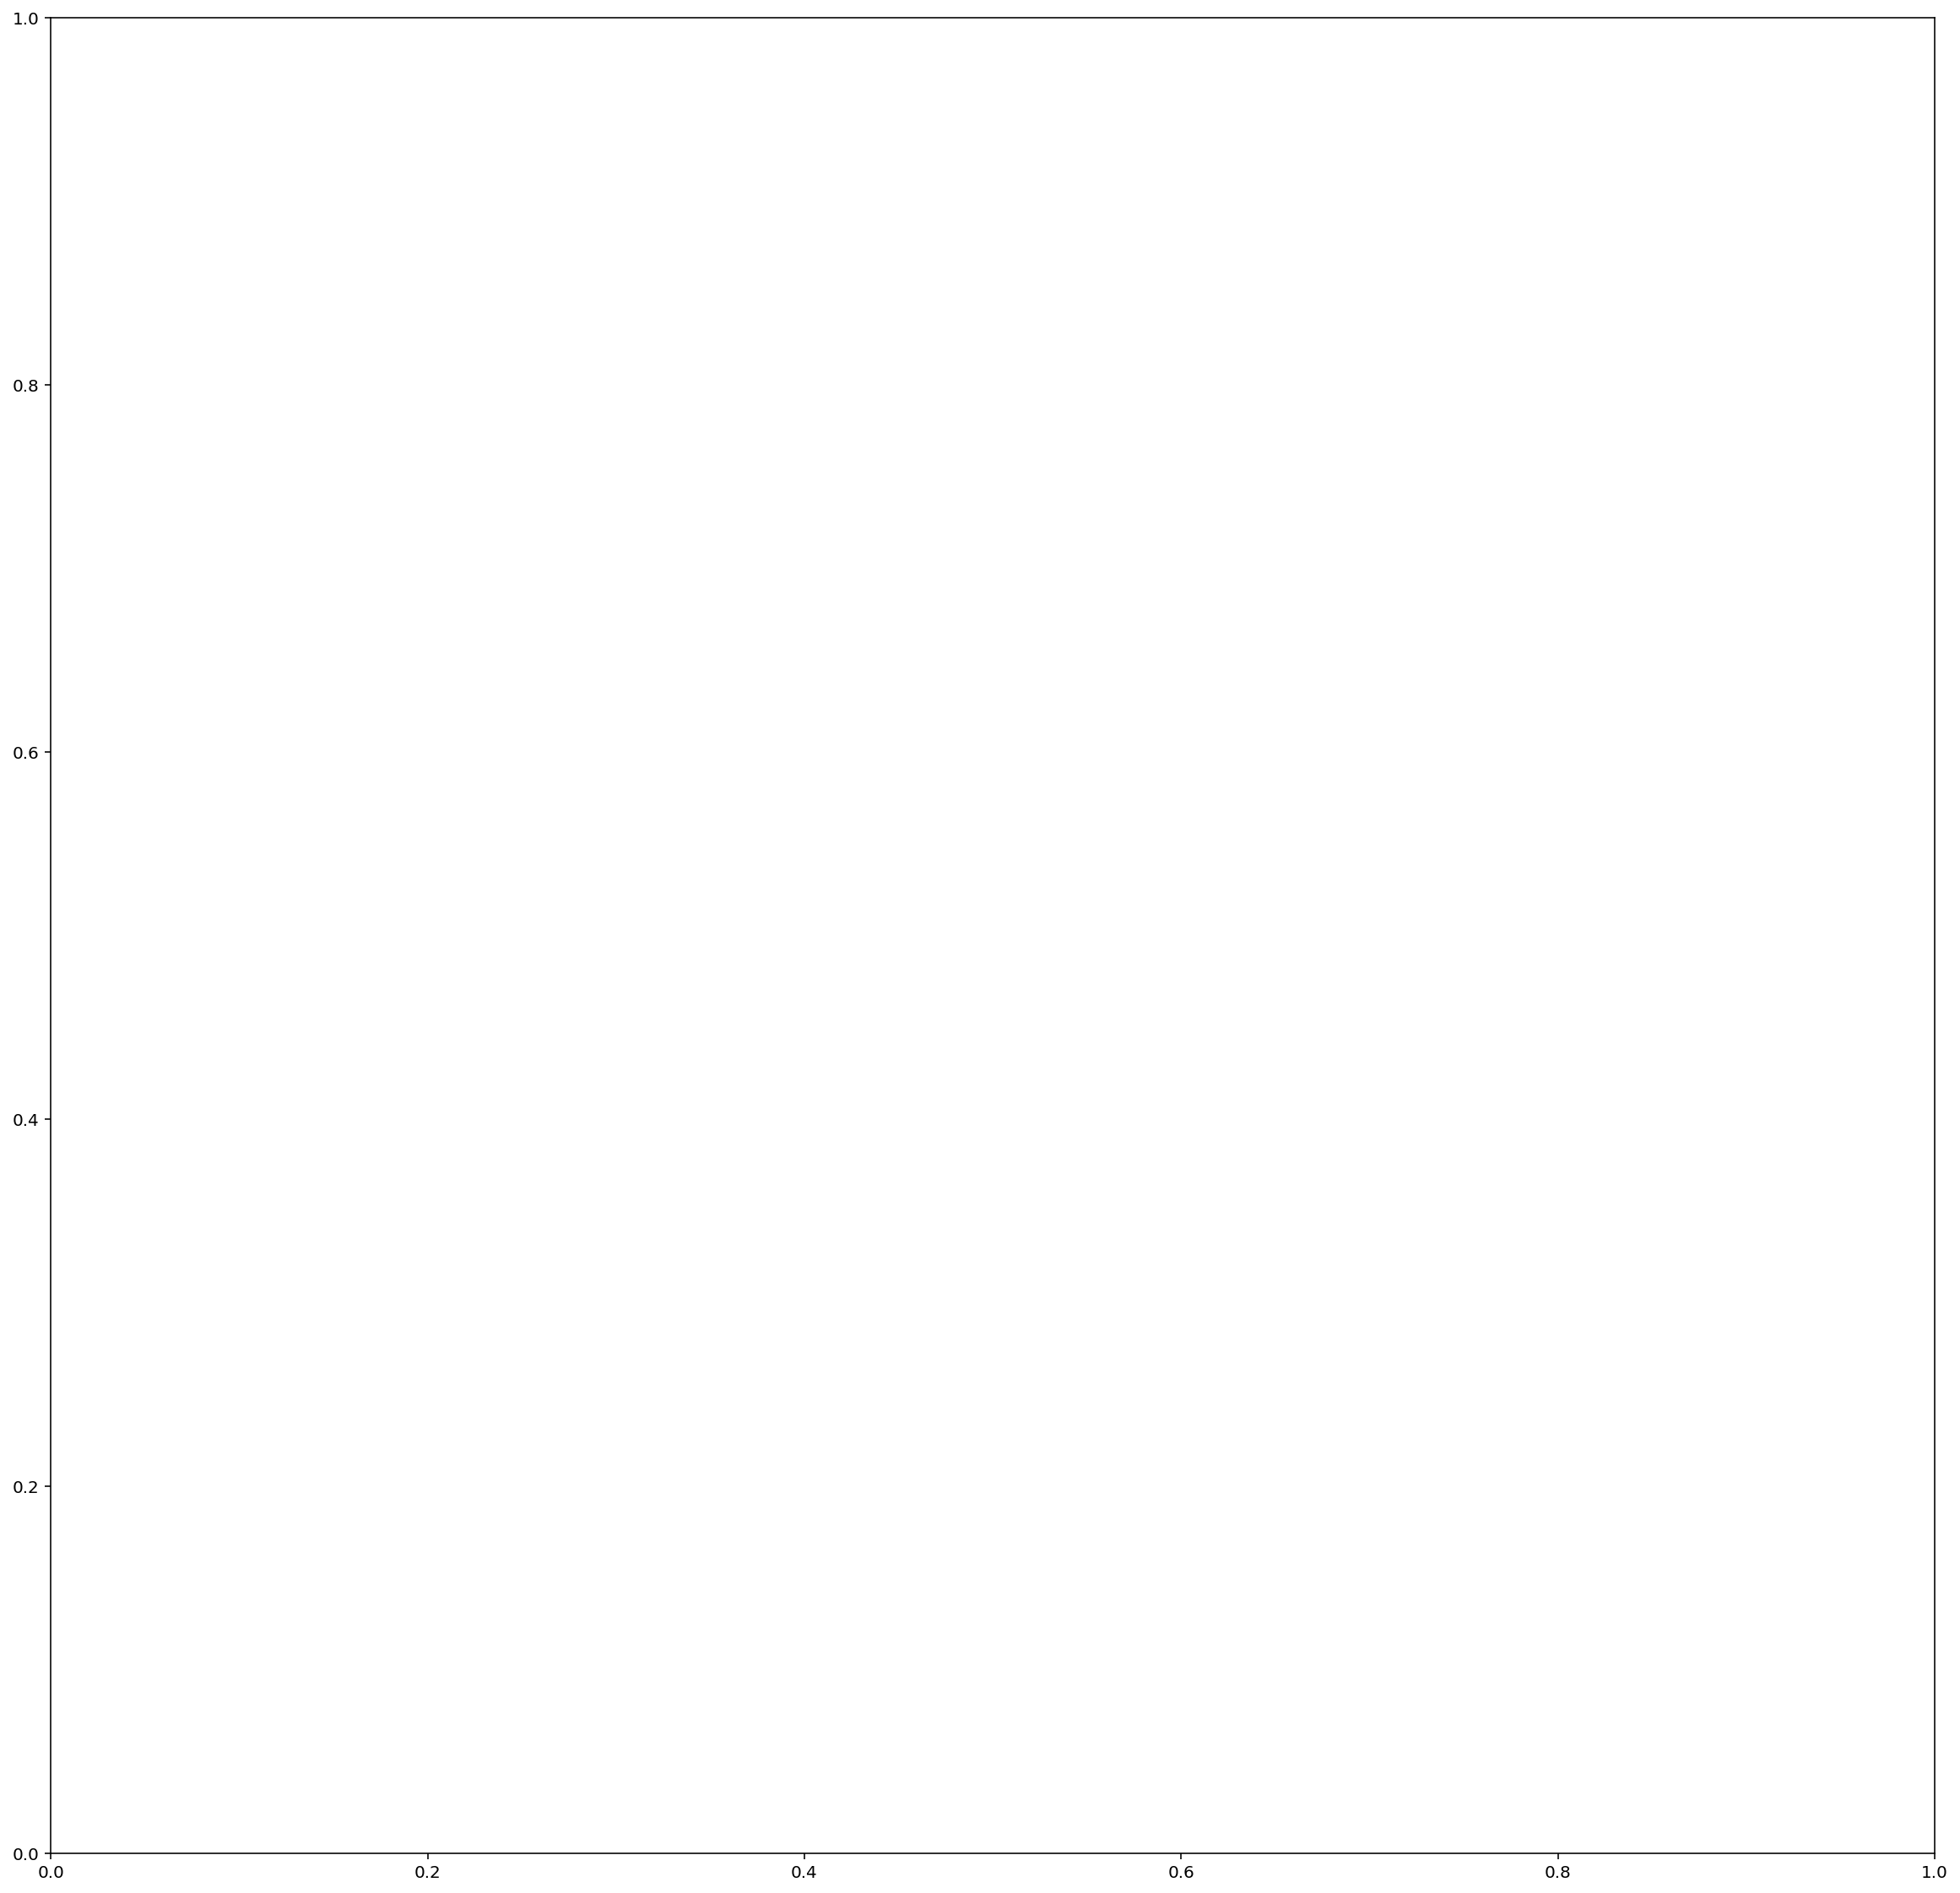

In [26]:
node_position = nx.get_node_attributes(track_graph1, "pos")
edge_labels = {edge: ind for ind, edge in enumerate(track_graph1.edges)}

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw_networkx(
    track_graph1,
    node_position,
    width=4,
    alpha=1,
    edge_cmap=plt.get_cmap("tab20"),
    ax=ax,
    with_labels=True,
    node_size=10,
)

In [89]:
nx.all_pairs_dijkstra_path_length?

Signature: nx.all_pairs_dijkstra_path_length(G, cutoff=None, weight='weight')
Docstring:
Compute shortest path lengths between all nodes in a weighted graph.

Parameters
----------
G : NetworkX graph

cutoff : integer or float, optional
   Depth to stop the search. Only return paths with length <= cutoff.

weight : string or function
   If this is a string, then edge weights will be accessed via the
   edge attribute with this key (that is, the weight of the edge
   joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
   such edge attribute exists, the weight of the edge is assumed to
   be one.

   If this is a function, the weight of an edge is the value
   returned by the function. The function must accept exactly three
   positional arguments: the two endpoints of an edge and the
   dictionary of edge attributes for that edge. The function must
   return a number.

Returns
-------
distance : iterator
    (source, dictionary) iterator with dictionary keyed by target and
    

In [95]:
from loren_frank_data_processing.position import get_graph_1D_2D_relationships

edge_order = [0, 2, 4, 1, 3]
edge_spacing = [15, 0, 15, 0]

node_linear_position, node_linear_distance = get_graph_1D_2D_relationships(
    track_graph, edge_order, edge_spacing, center_well_id)

In [97]:
node_linear_distance

array([[  0.        ,  74.03652192],
       [ 74.03652192, 105.6734667 ],
       [105.6734667 , 177.2557517 ],
       [ 74.03652192, 110.67918698],
       [110.67918698, 186.1969154 ]])

In [107]:
for id, df in position_df.groupby('track_segment_id'):
    min_lin_dist, max_lin_dist = node_linear_distance[int(id)]
    df.loc[df.linear_distance < min_lin_dist] = min_lin_dist
    df.loc[df.linear_distance > max_lin_dist] = max_lin_dist

In [ ]:
from loren_frank_data_processing import get_interpolated_position_dataframe

position_info = get_interpolated_position_dataframe(epoch_key, animals)

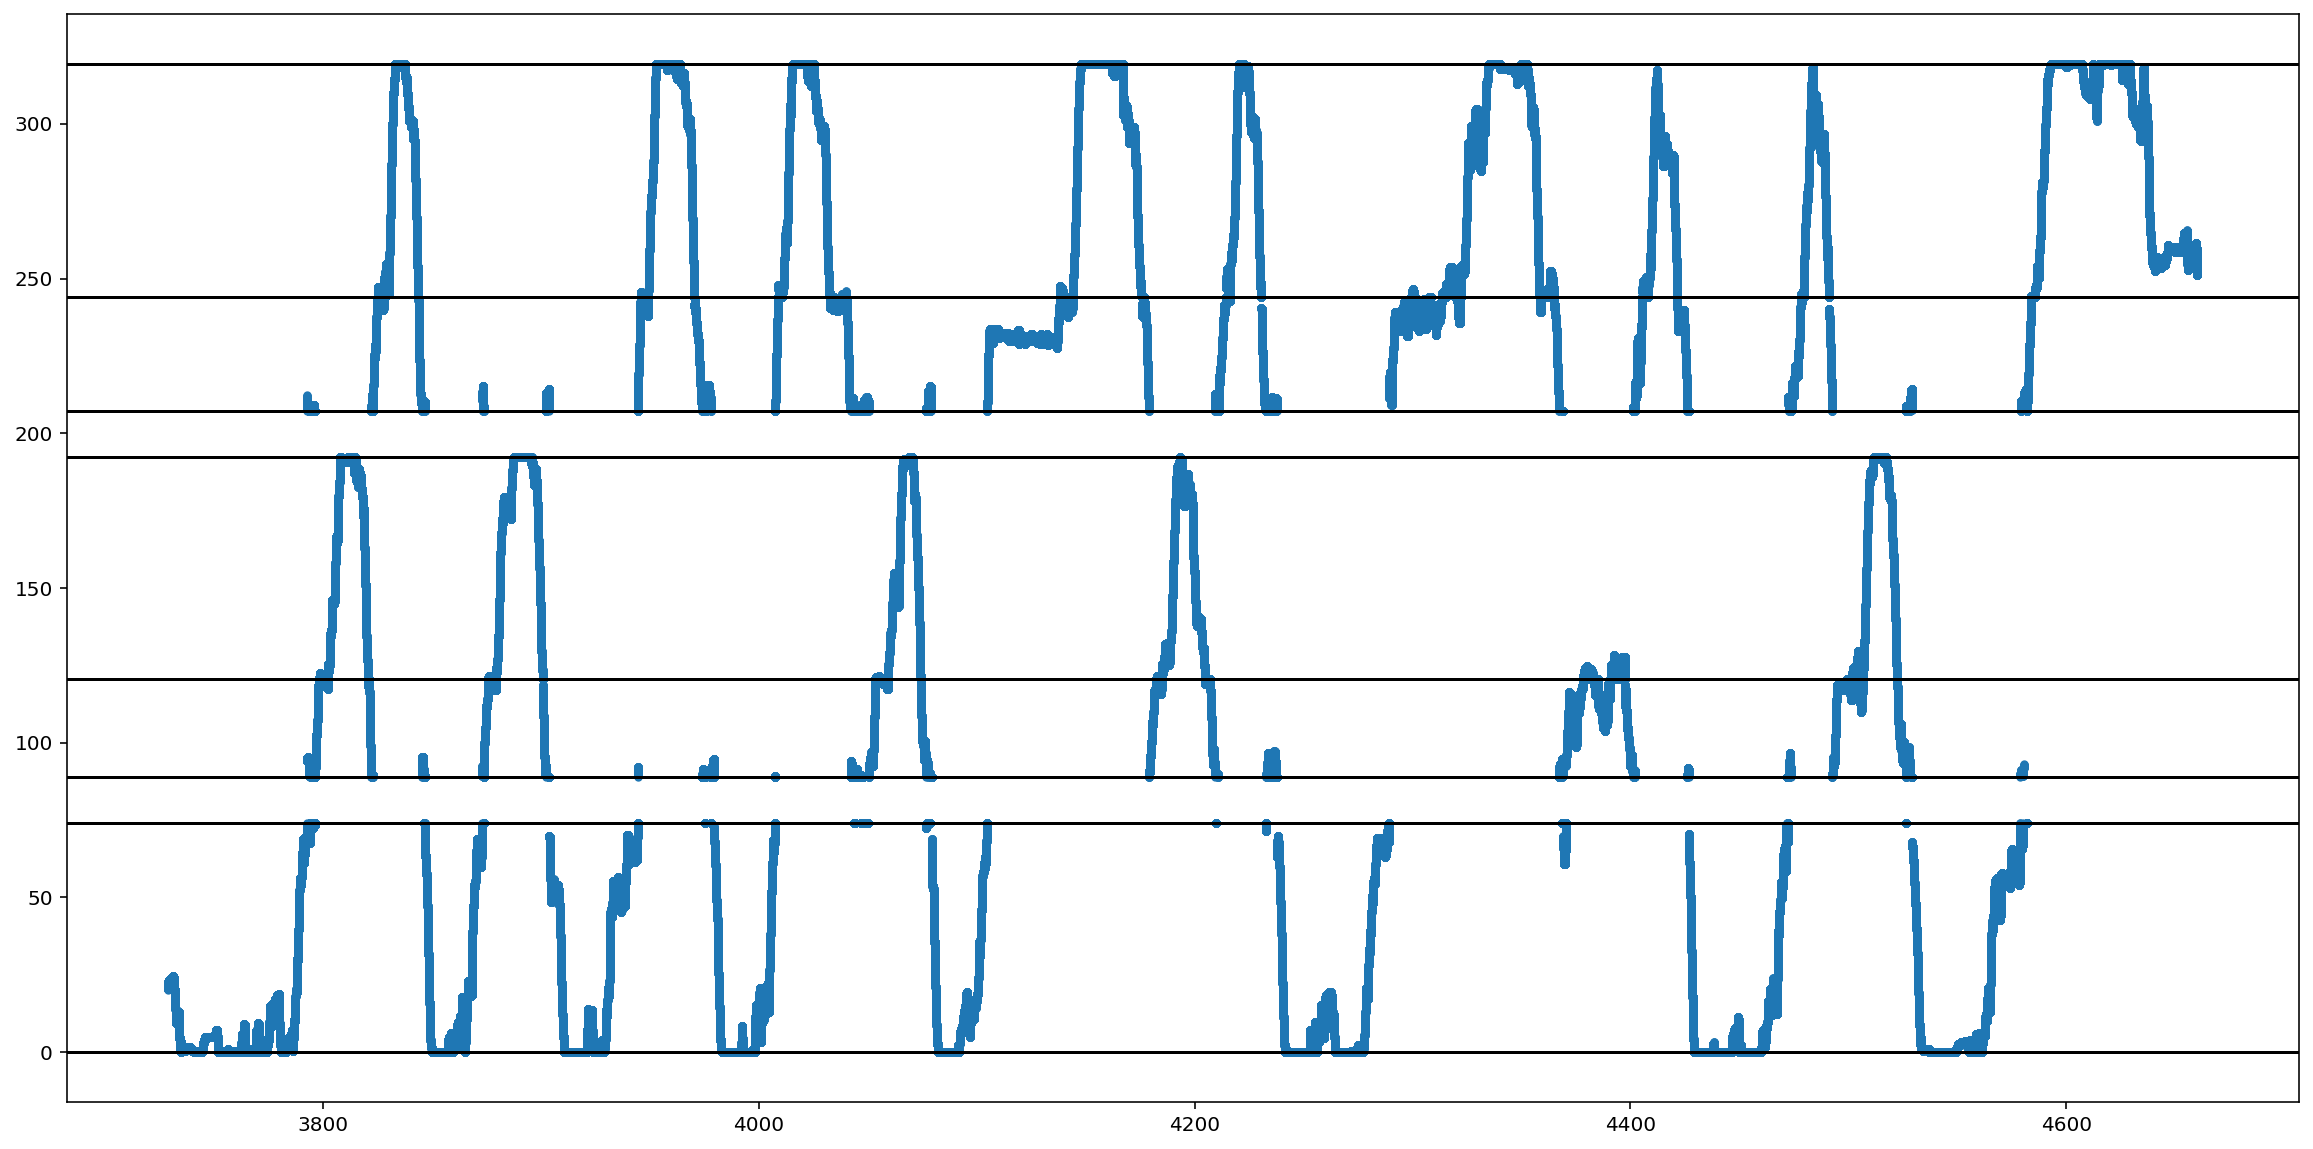

In [116]:
plt.figure(figsize=(20, 10))

plt.scatter(
    position_info.index / np.timedelta64(1, 's'),
    position_info.linear_position, s=10)

for p in node_linear_position.flat:
    plt.axhline(p, color='black')

In [129]:
3_000_000 / 300

10000.0

In [93]:

n_time = position.shape[0]
list(range(1, n_time, 100))

[1,
 501,
 1001,
 1501,
 2001,
 2501,
 3001,
 3501,
 4001,
 4501,
 5001,
 5501,
 6001,
 6501,
 7001,
 7501,
 8001,
 8501,
 9001,
 9501,
 10001,
 10501,
 11001,
 11501,
 12001,
 12501,
 13001,
 13501,
 14001,
 14501,
 15001,
 15501,
 16001,
 16501,
 17001,
 17501,
 18001,
 18501,
 19001,
 19501,
 20001,
 20501,
 21001,
 21501,
 22001,
 22501,
 23001,
 23501,
 24001,
 24501,
 25001,
 25501,
 26001,
 26501,
 27001,
 27501]

In [15]:
position_df = get_position_dataframe(epoch_key, animals)

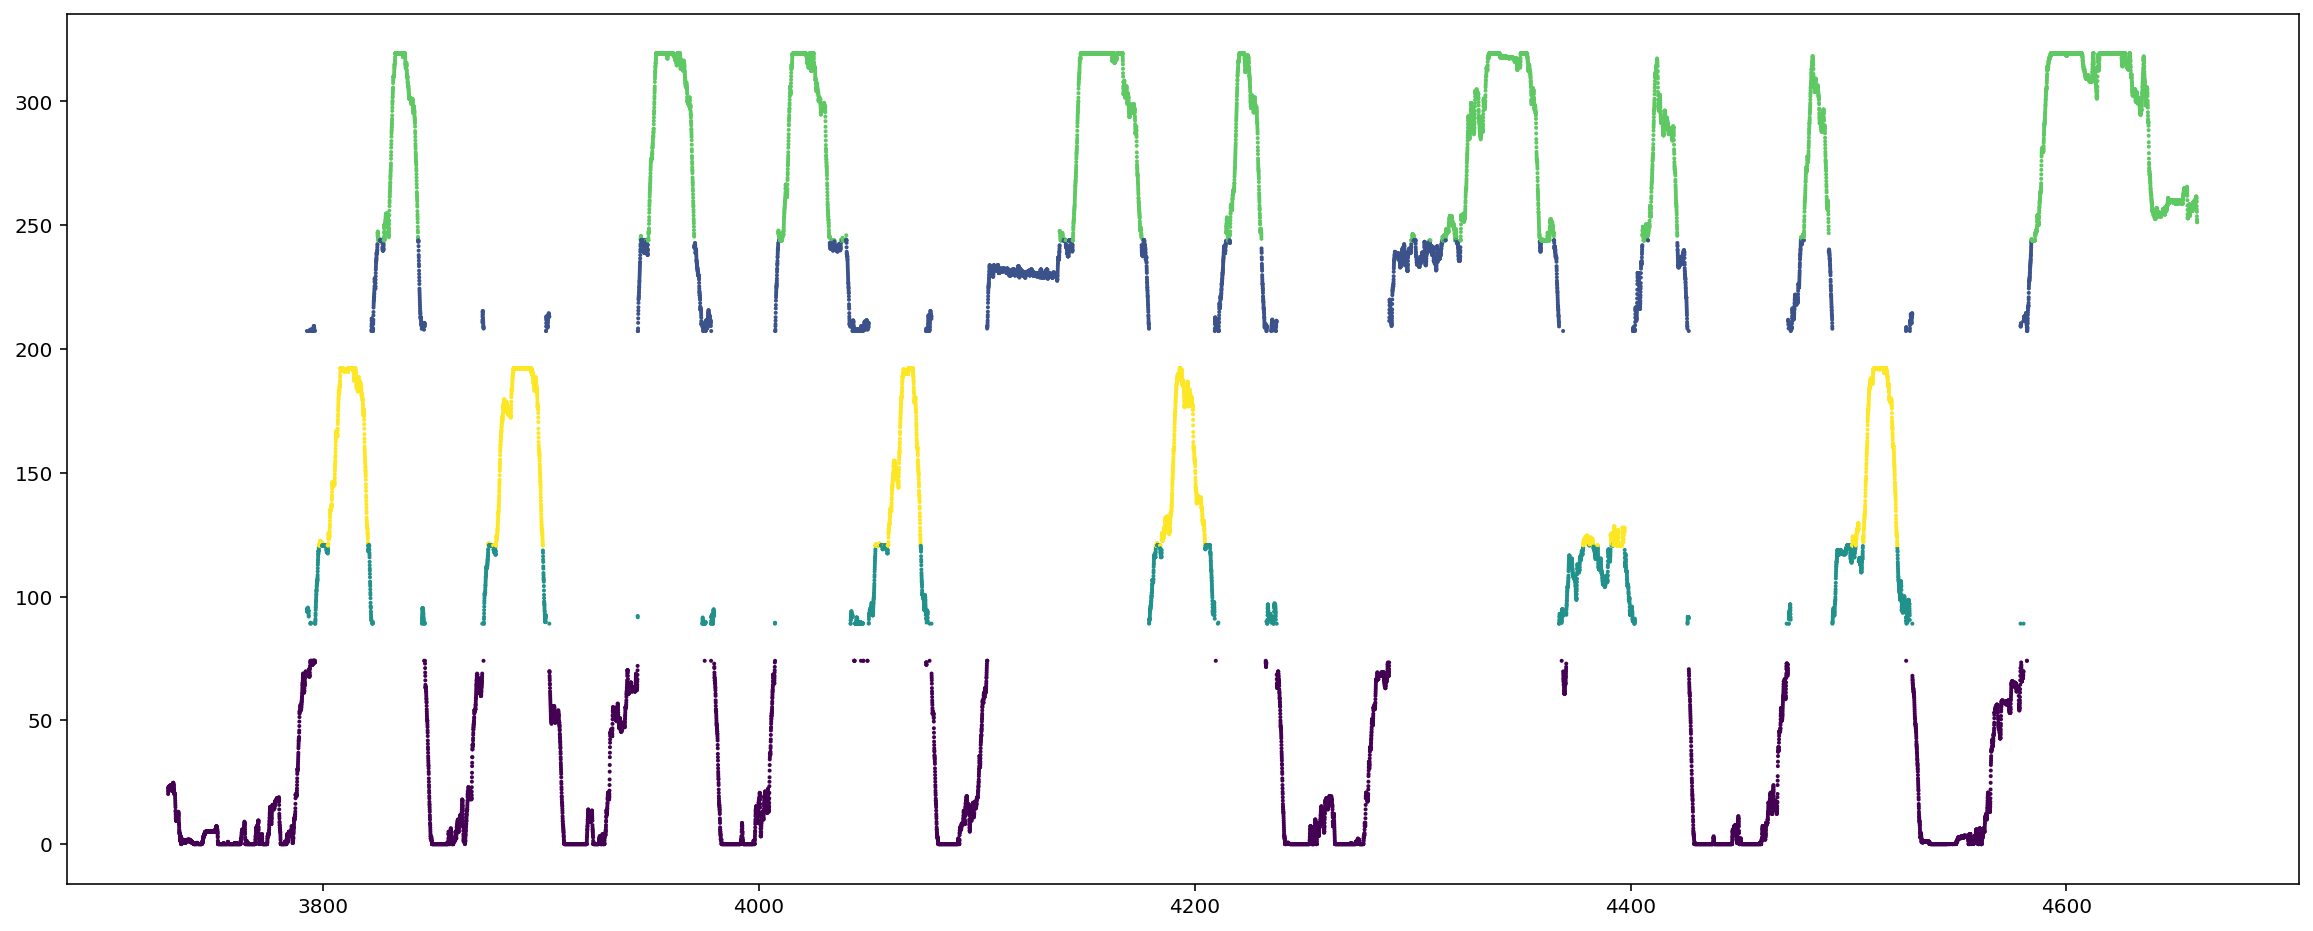

In [18]:
plt.figure(figsize=(20, 8))

plt.scatter(
    position_df.index / np.timedelta64(1, 's'),
    position_df.linear_position,
    c=position_df.track_segment_id.astype(int), s=1)

In [141]:
import scipy

pd.DataFrame(scipy.sparse.csgraph.dijkstra(nx.to_scipy_sparse_matrix(track_graph1, weight='distance'))[n_segments:, n_segments:])

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,156.116873,157.019657,103.219230,103.219230,97.944758,97.435866,195.152436,196.072088,21.090040,20.185737
1,156.116873,0.000000,0.902784,52.897643,52.897643,58.172115,58.681008,144.830849,145.750501,135.026833,135.931137
2,157.019657,0.902784,0.000000,53.800427,53.800427,59.074898,59.583791,145.733633,146.653285,135.929617,136.833920
3,103.219230,52.897643,53.800427,0.000000,0.000000,5.274472,5.783364,91.933206,92.852858,82.129190,83.033493
4,103.219230,52.897643,53.800427,0.000000,0.000000,5.274472,5.783364,91.933206,92.852858,82.129190,83.033493
5,97.944758,58.172115,59.074898,5.274472,5.274472,0.000000,0.508893,97.207678,98.127330,76.854718,77.759022
6,97.435866,58.681008,59.583791,5.783364,5.783364,0.508893,0.000000,97.716570,98.636222,76.345825,77.250129
7,195.152436,144.830849,145.733633,91.933206,91.933206,97.207678,97.716570,0.000000,0.919652,174.062396,174.966699
8,196.072088,145.750501,146.653285,92.852858,92.852858,98.127330,98.636222,0.919652,0.000000,174.982048,175.886351
9,21.090040,135.026833,135.929617,82.129190,82.129190,76.854718,76.345825,174.062396,174.982048,0.000000,0.904304


In [158]:
n_segments = len(track_graph.edges)
track_graph1 = track_graph.copy()

# insert virtual node
for edge_number, (position_t, position_t_1, (node1, node2)) in enumerate(
        zip(candidates_t, candidates_t_1, track_graph.edges)):
    node_name_t, node_name_t_1 = f't_0_{edge_number}', f't_1_{edge_number}'
    nx.add_path(track_graph1, [node1, node_name_t, node2])
    nx.add_path(track_graph1, [node1, node_name_t_1, node2])
    nx.add_path(track_graph1, [node_name_t, node_name_t_1])
    track_graph1.nodes[node_name_t]['pos'] = tuple(position_t)
    track_graph1.nodes[node_name_t_1]['pos'] = tuple(position_t_1)
    
# calculate distance
for node1, node2 in track_graph1.edges:
    x1, y1 = track_graph1.nodes[node1]['pos']
    x2, y2 = track_graph1.nodes[node2]['pos']
    track_graph1.edges[(node1, node2)]['distance'] = sqrt(
        (x2 - x1)**2 + (y2 - y1)**2)

In [159]:
%timeit scipy.sparse.csgraph.dijkstra(nx.to_scipy_sparse_matrix(track_graph1, weight='distance'))

474 µs ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [160]:
%timeit dict(nx.all_pairs_dijkstra_path_length(track_graph1, weight="distance"))

859 µs ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [161]:
# calculate path distance
path_distance = scipy.sparse.csgraph.dijkstra(
    nx.to_scipy_sparse_matrix(track_graph1, weight='distance'))

['t_0_4', 't_0_4', 't_0_4', 't_0_4', 't_0_4']

In [167]:
[f't_1_{edge_number}' for n in range(n_segments)]

['t_1_4', 't_1_4', 't_1_4', 't_1_4', 't_1_4']

In [172]:
len(track_graph.nodes)

6

In [181]:
list(track_graph1.nodes)[len(track_graph.nodes)::2]

['t_0_0', 't_0_1', 't_0_2', 't_0_3', 't_0_4']

In [180]:
list(track_graph1.nodes)[len(track_graph.nodes)+1::2]

['t_1_0', 't_1_1', 't_1_2', 't_1_3', 't_1_4']

In [185]:
start_node_ind = np.arange(len(track_graph1.nodes))[len(track_graph.nodes)::2]
end_node_ind = np.arange(len(track_graph1.nodes))[len(track_graph.nodes)+1::2]

In [187]:
np.array(track_graph1.nodes)[start_node_ind]

array(['t_0_0', 't_0_1', 't_0_2', 't_0_3', 't_0_4'], dtype='<U21')

In [188]:
np.array(track_graph1.nodes)[end_node_ind]

array(['t_1_0', 't_1_1', 't_1_2', 't_1_3', 't_1_4'], dtype='<U21')

In [189]:
np.array(track_graph1.nodes)

array(['0', '1', '2', '3', '4', '5', 't_0_0', 't_1_0', 't_0_1', 't_1_1',
       't_0_2', 't_1_2', 't_0_3', 't_1_3', 't_0_4', 't_1_4'], dtype='<U21')

In [190]:
n_original_nodes, n_total_nodes = (
    len(track_graph.nodes), len(track_graph1.nodes))
node_ind = np.arange(n_total_nodes)
start_node_ind = node_ind[n_original_nodes::2]
end_node_ind = node_ind[n_original_nodes + 1::2]

In [205]:
test = np.arange(path_distance.shape[0]**2).reshape(path_distance.shape)

test[start_node_ind][:,end_node_ind]

array([[103, 105, 107, 109, 111],
       [135, 137, 139, 141, 143],
       [167, 169, 171, 173, 175],
       [199, 201, 203, 205, 207],
       [231, 233, 235, 237, 239]])

In [194]:
path_distance.shape

(16, 16)

In [199]:
end_node_ind

array([ 7,  9, 11, 13, 15])

In [207]:
%timeit get_position_dataframe(epoch_key, animals)

28.8 s ± 669 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
position_df = get_position_dataframe(epoch_key, animals)

NameError: name 'node_linear_position' is not defined

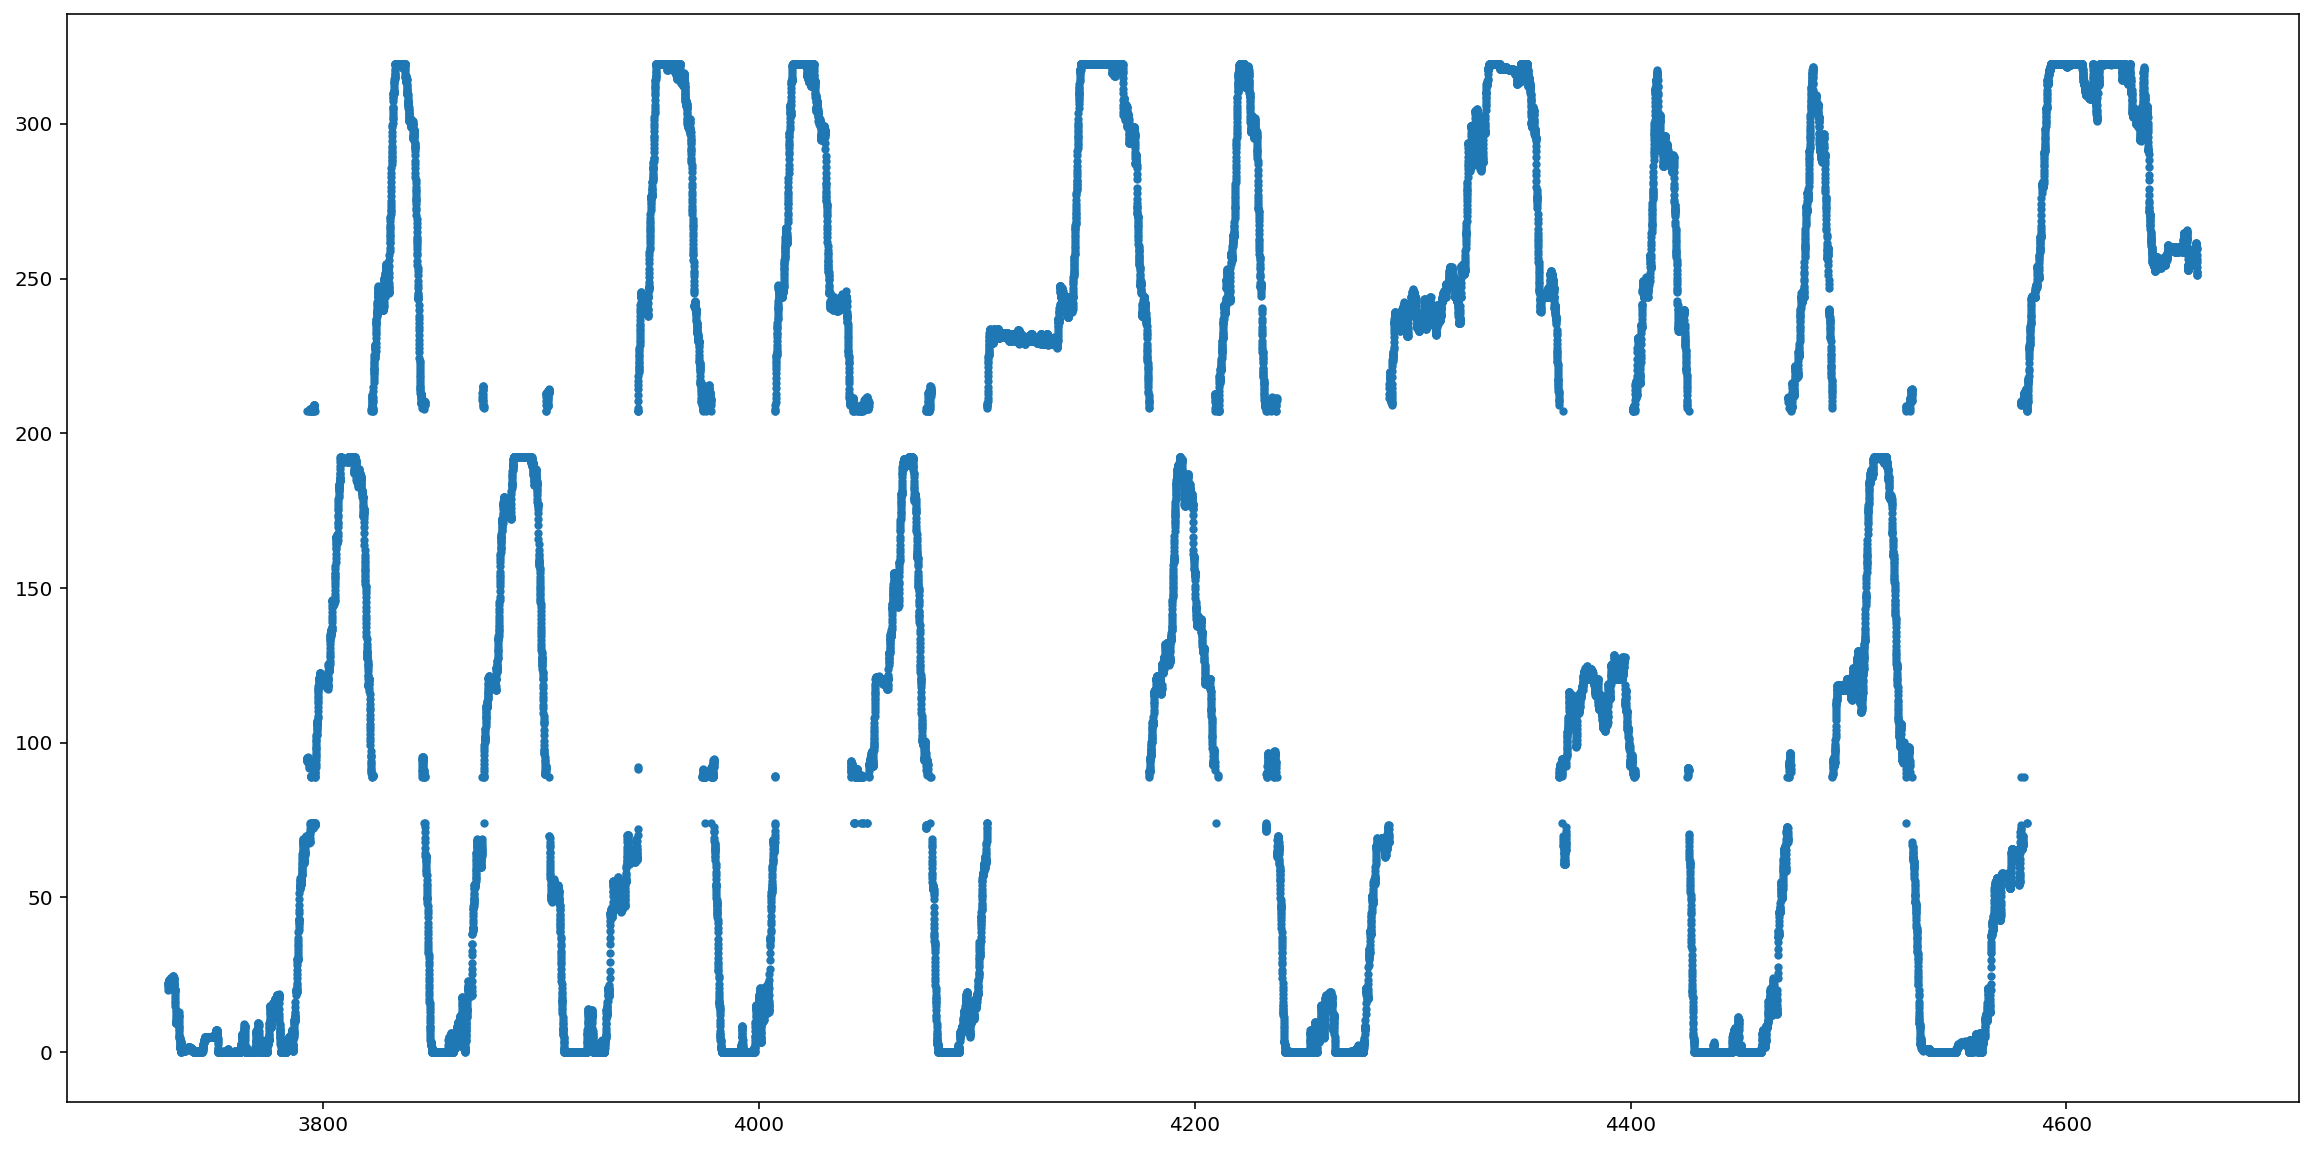

In [14]:
plt.figure(figsize=(20, 10))

plt.scatter(
    position_df.index / np.timedelta64(1, 's'),
    position_df.linear_position, s=10)

for p in node_linear_position.flat:
    plt.axhline(p, color='black')

In [216]:
%%time

from loren_frank_data_processing.track_segment_classification import classify_track_segments

position = position_info.loc[:, ['x_position', 'y_position']].values
route_euclidean_distance_scaling = 1
sensor_std_dev = 5
diagonal_bias = 0.1

track_segment_id = classify_track_segments(
    track_graph, position,
    route_euclidean_distance_scaling=route_euclidean_distance_scaling,
    sensor_std_dev=sensor_std_dev,
    diagonal_bias=diagonal_bias)

CPU times: user 18min 31s, sys: 45.3 s, total: 19min 17s
Wall time: 22min 27s


In [223]:
from loren_frank_data_processing.position import _calulcate_linear_position, calculate_linear_distance

ld = calculate_linear_distance(
        track_graph, track_segment_id, center_well_id, position)
lp = _calulcate_linear_position(ld,
                                track_segment_id, track_graph, center_well_id, edge_order, edge_spacing)

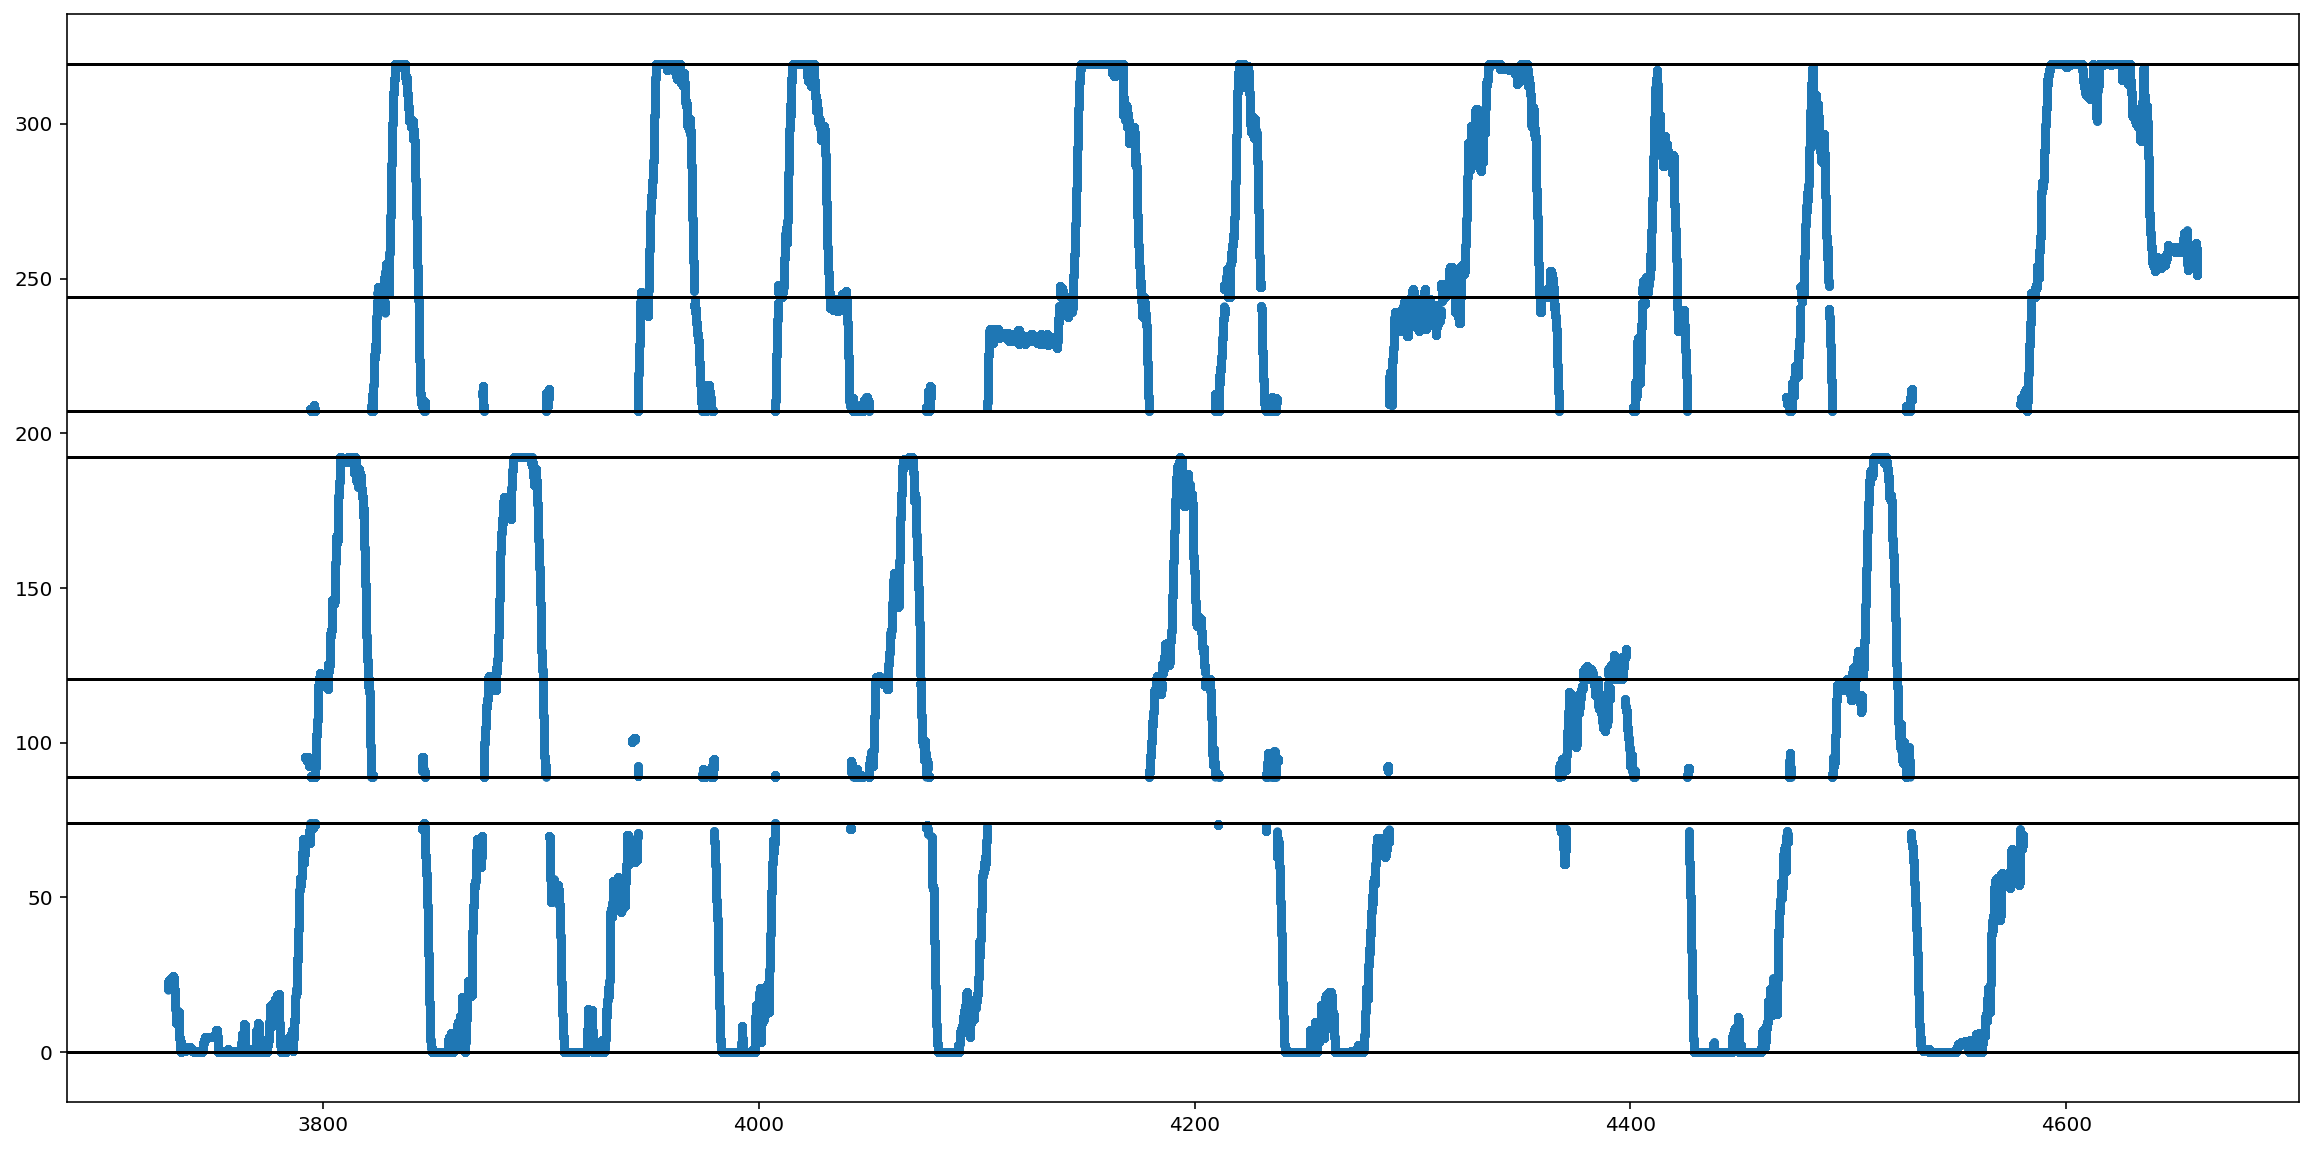

In [224]:
plt.figure(figsize=(20, 10))

plt.scatter(
    position_info.index / np.timedelta64(1, 's'),
    lp, s=10)

for p in node_linear_position.flat:
    plt.axhline(p, color='black')